In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("movies.csv")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   54214 non-null  int64 
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [65]:
df = pd.DataFrame(movie_data)

NameError: name 'movie_data' is not defined

In [66]:
df.head(100)

Unnamed: 0        genre                                        description
0            0        drama  Listening in to a conversation between his doc...
1            1     thriller  A brother and sister with a past incestuous re...
2            2        adult  As the bus empties the students for their fiel...
3            3        drama  To help their unemployed father make ends meet...
4            4        drama  The film's title refers not only to the un-rec...
..         ...          ...                                                ...
95          95  documentary  This feature documentary follows the various d...
96          96        drama  As indicated by the title, this is an obvious ...
97          97        drama  Del Canyon reluctantly returns to his small ho...
98          98        drama  Verlin is 9 years old and does not talk, nor d...
99          99  documentary  In 1994 the reggae/dance duo Reel 2 Real, feat...

[100 rows x 3 columns]

In [67]:
df.to_csv('movies.csv')

In [68]:
df.info

<bound method DataFrame.info of        Unnamed: 0        genre  \
0               0        drama   
1               1     thriller   
2               2        adult   
3               3        drama   
4               4        drama   
...           ...          ...   
54209       54209       comedy   
54210       54210       horror   
54211       54211  documentary   
54212       54212       comedy   
54213       54213      history   

                                             description  
0      Listening in to a conversation between his doc...  
1      A brother and sister with a past incestuous re...  
2      As the bus empties the students for their fiel...  
3      To help their unemployed father make ends meet...  
4      The film's title refers not only to the un-rec...  
...                                                  ...  
54209  This short-lived NBC live sitcom centered on B...  
54210  The NEXT Generation of EXPLOITATION. The siste...  
54211  Ze bestaan echt, is a

In [69]:
df.shape

(54214, 3)

In [70]:
df.dtypes

Unnamed: 0      int64
genre          object
description    object
dtype: object

In [73]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [74]:
df.columns

Index(['genre', 'description'], dtype='object')

In [75]:
df.dropna().any()

genre          True
description    True
dtype: bool

In [76]:
df.dropna(inplace=True)

In [77]:
df.dropna().any()

genre          True
description    True
dtype: bool

In [78]:
df.isnull().sum().sum()

0

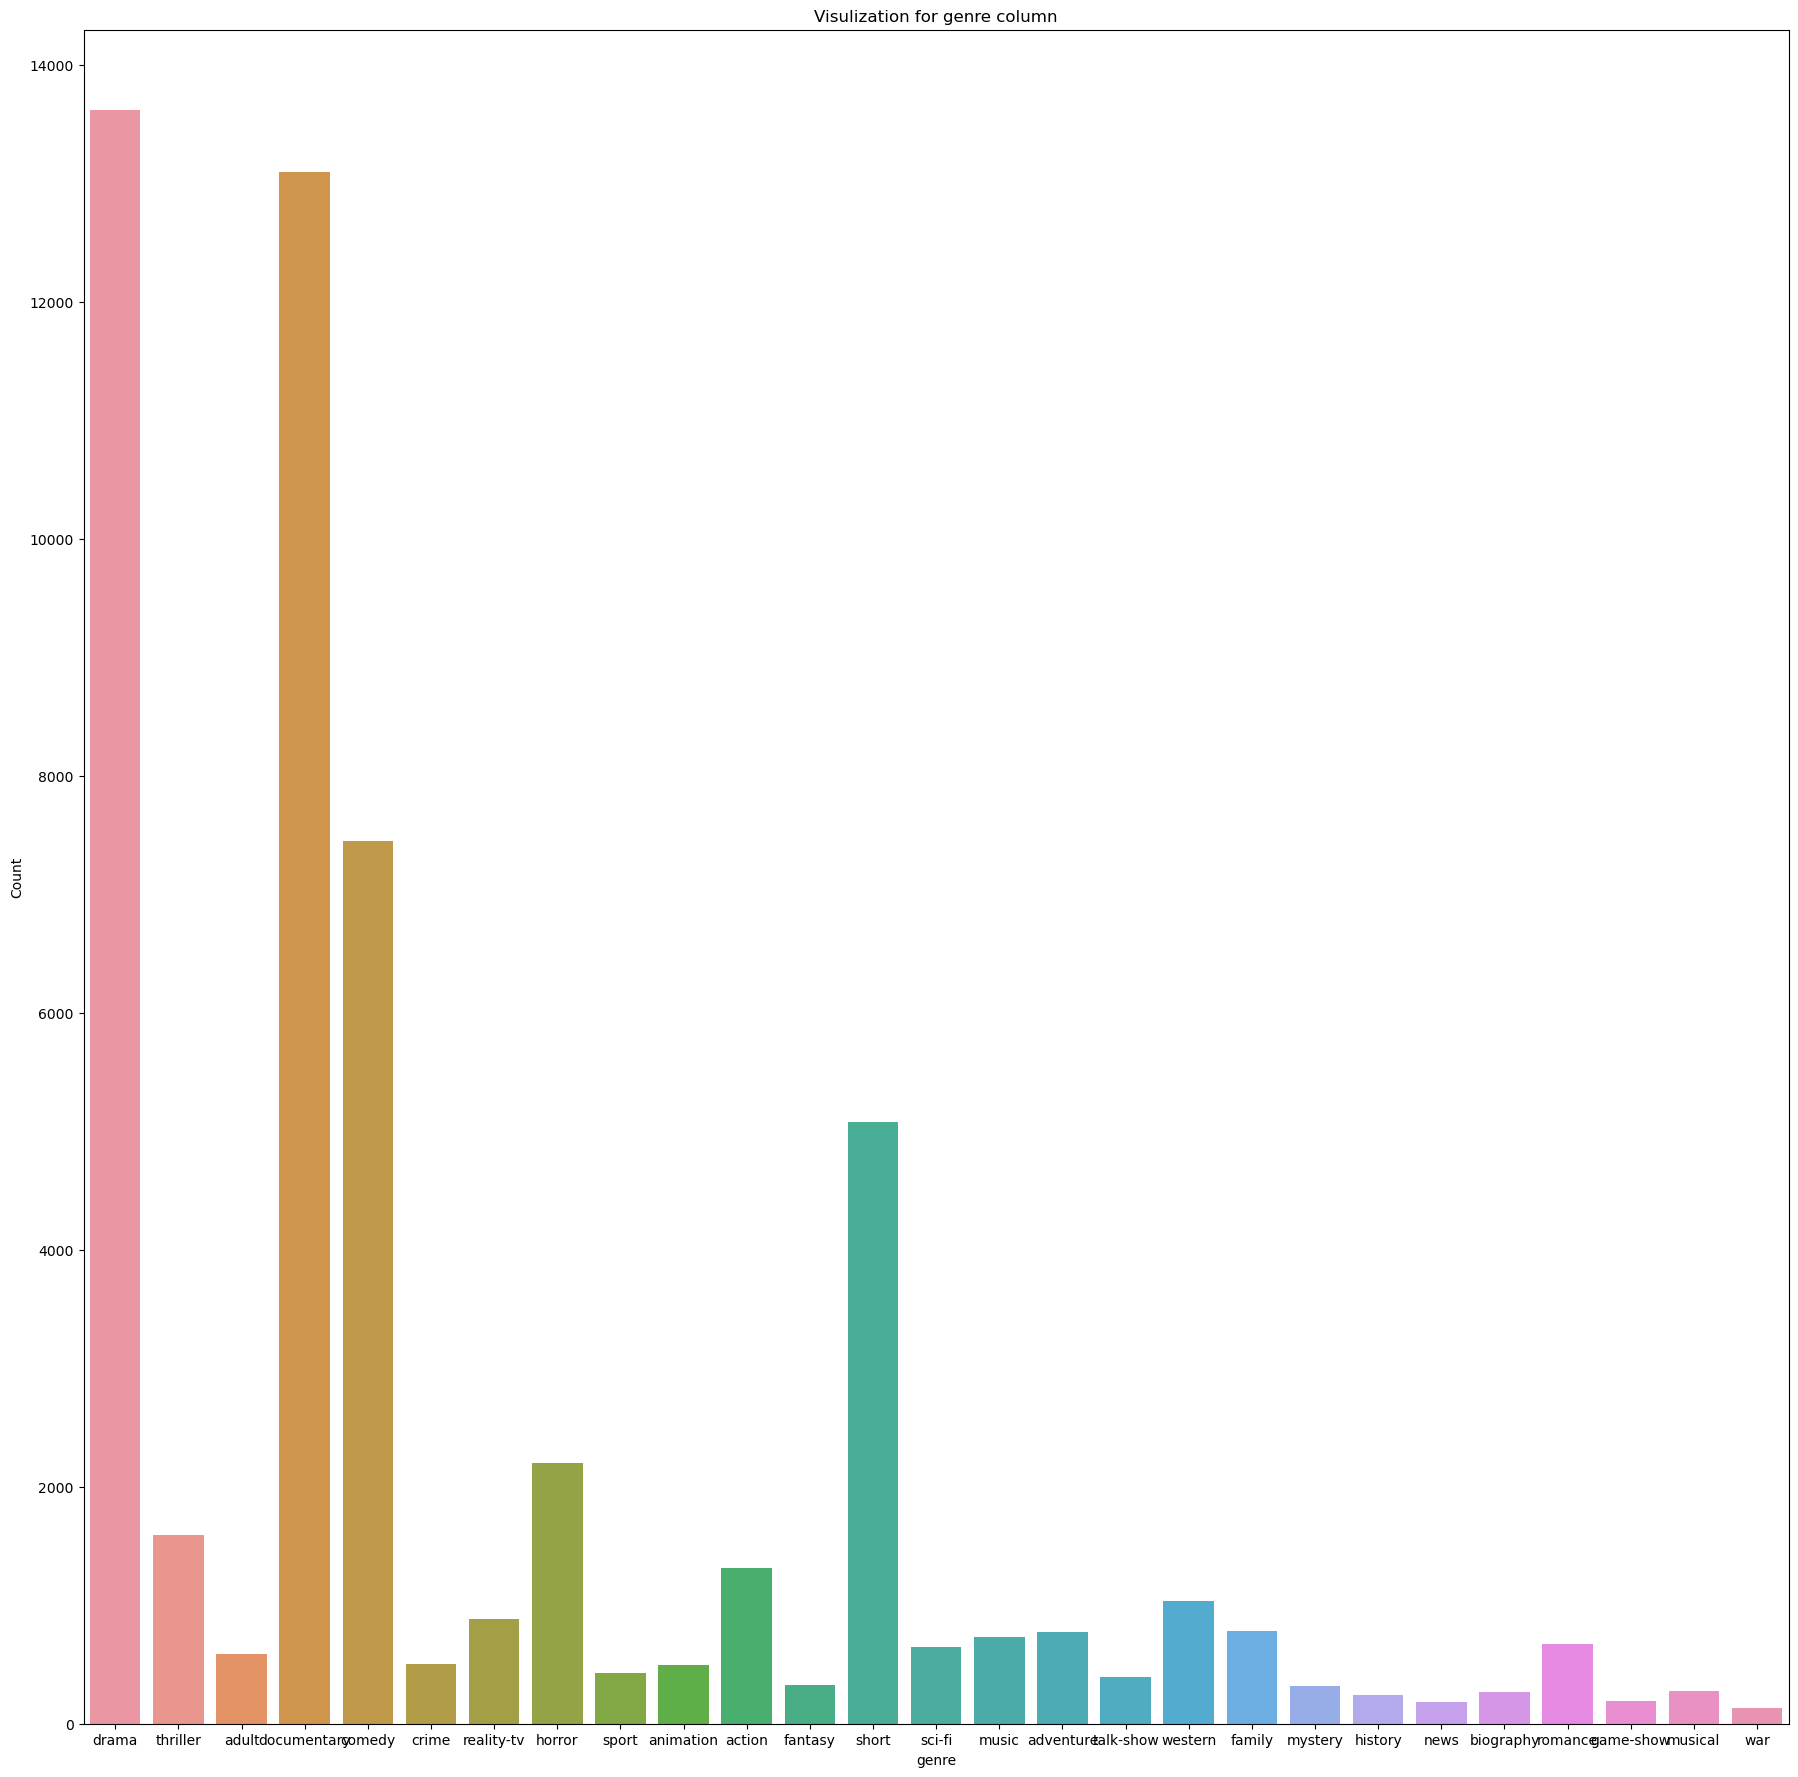

In [79]:
plt.figure(figsize=(22,22))
sns.countplot(x='genre',data=df)
plt.title("Visulization for genre column")
plt.xlabel("genre")
plt.ylabel("Count")
plt.show()

In [80]:
df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [81]:
genre_map = {'drama':1, 'thriller':2, 'adult':3, 'documentary':4, 'comedy':5, 'crime':6,'reality-tv':7, 'horror':8, 'sport':9, 'animation':10, 'action':11,'fantasy':12,'short':13, 'sci-fi':14, 'music':15, 'adventure':16, 'talk-show':17, 'western':18,'family':19, 'mystery':20, 'history':21, 'news':22, 'biography':23, 'romance':24,'game-show':25, 'musical':26, 'war':27}
df['genre'] = df['genre'].map(genre_map)

In [82]:
df.head()

genre                                        description
0      1  Listening in to a conversation between his doc...
1      2  A brother and sister with a past incestuous re...
2      3  As the bus empties the students for their fiel...
3      1  To help their unemployed father make ends meet...
4      1  The film's title refers not only to the un-rec...

In [83]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fikre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the script words
  words = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['description'][i])

  # Converting the entire script into lower case
  words = words.lower()

  # Tokenizing the script by words
  words = words.split()

  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  words = ' '.join(words)

  # Creating a corpus
  corpus.append(words)

In [85]:
corpus[:15]

['listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue',
 'brother sister past incestu relationship current murder relationship murder women reject murder women get close',
 'bu empti student field trip museum natur histori littl tour guid suspect student anoth tour first lectur film co drift dream erot fantasi one imagin film releas emot fantasi erot uncommon way one slip curat offic littl acquisit anoth find anthropologist see bone identifi even head teacher immun soon tour bu depart everyon admit quit educ',
 'help unemploy father make end meet edith twin sister grace work seamstress invalid grace fall prey temptat chinatown opium becom addict condit worsen misguid physician prescrib morphin eas pain 

In [86]:
drama_words = []
for i in list(df[df['genre']==1].index):
  drama_words.append(corpus[i])

thriller_words = []
for i in list(df[df['genre']==2].index):
  thriller_words.append(corpus[i])

adult_words = []
for i in list(df[df['genre']==3].index):
  adult_words.append(corpus[i])

documentary_words = []
for i in list(df[df['genre']==4].index):
  documentary_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==5].index):
  comedy_words.append(corpus[i])

drama = ''
thriller = ''
adult = ''
documentary = ''
comedy = ''

for i in range(1, 7):
  drama += drama_words[i]
  thriller += thriller_words[i]
  adult += adult_words[i]
  documentary += documentary_words[i]
  comedy += comedy_words[i]

In [87]:
!pip install wordcloud

In [88]:
from wordcloud import WordCloud

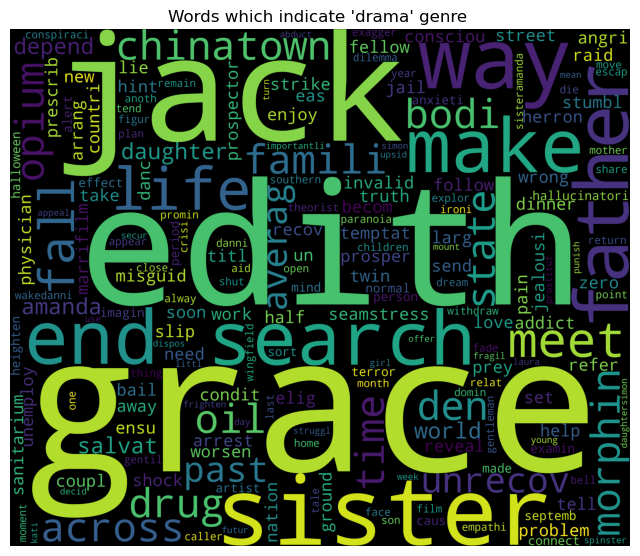

In [89]:
# Creating wordcloud for drama genre
wordcloud1 = WordCloud(background_color='Black', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'drama' genre ")
plt.show()

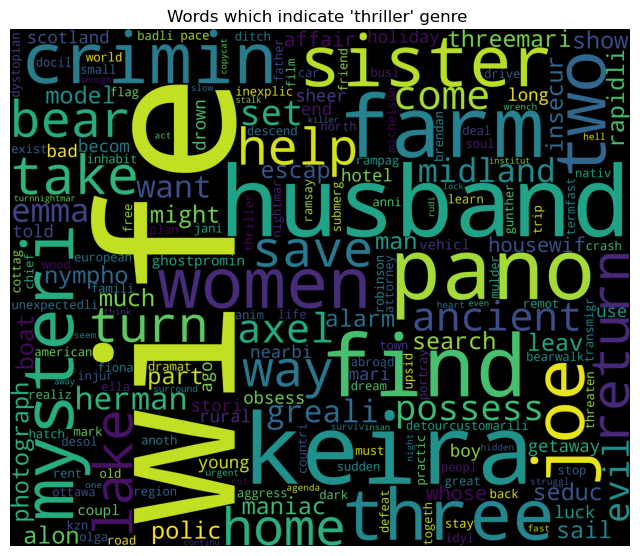

In [90]:
# Creating wordcloud for drama genre
wordcloud2 = WordCloud(background_color='Black', width=3000, height=2500).generate(thriller)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'thriller' genre ")
plt.show()

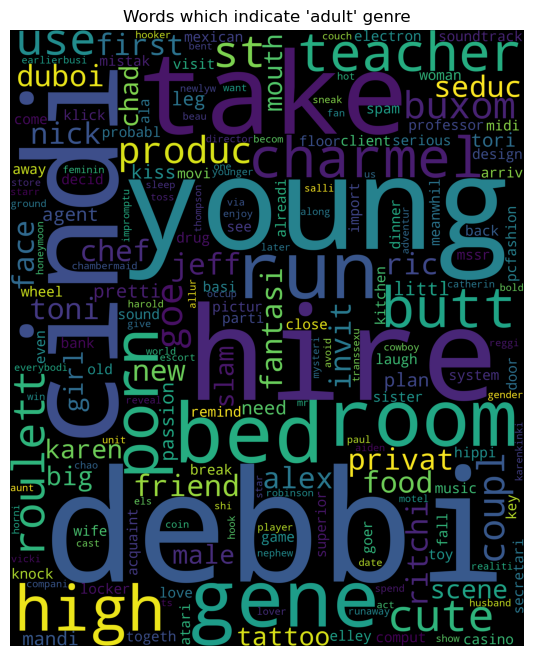

In [91]:
from wordcloud import WordCloud
wordcloud3 = WordCloud(background_color='Black', height=3000, width=2500).generate(adult)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.title("Words which indicate 'adult' genre")
plt.axis("off")
plt.show()

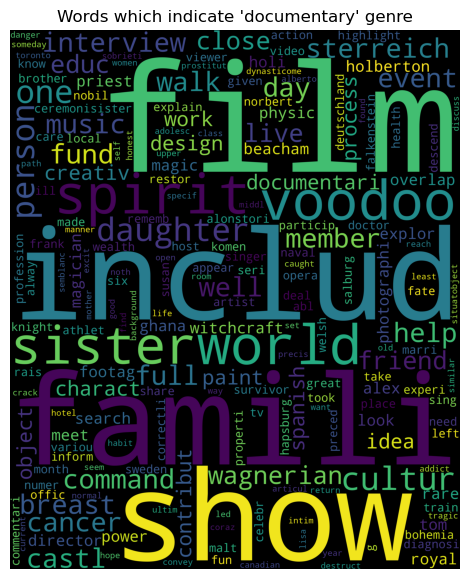

In [92]:
#Creating the wordcloud from action genre
from wordcloud import WordCloud
wordcloud4 = WordCloud(background_color='Black', height=3000, width=2500).generate(documentary)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud4)
plt.axis("off")
plt.title("Words which indicate 'documentary' genre")
plt.show()

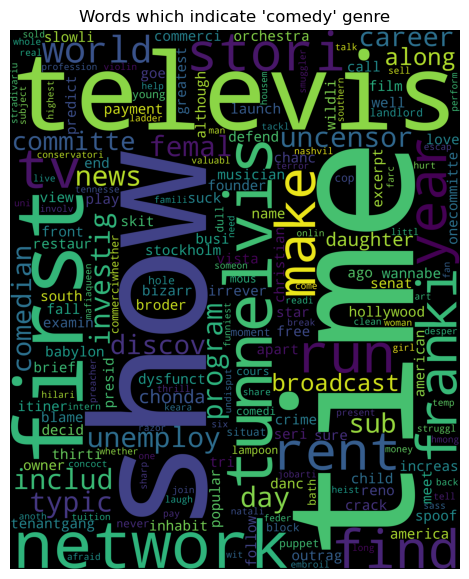

In [93]:
#Creating the wordcloud from action genre
from wordcloud import WordCloud
wordcloud5 = WordCloud(background_color='Black', height=3000, width=2500).generate(comedy)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud5)
plt.axis("off")
plt.title("Words which indicate 'comedy' genre")
plt.show()

In [94]:
#Creating Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [95]:
y = df['genre'].values
y

array([ 1,  2,  3, ...,  4,  5, 21], dtype=int64)

In [96]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)
print("Training Size: {}, Test Size{}".format(training_x.shape,test_x.shape))

Training Size: (43371, 10000), Test Size(10843, 10000)


In [97]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB()

In [98]:
y_pred = mnb.predict(test_x)

In [99]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,y_pred)
print("-------Score---------")
print("Accuracy Score is: {}".format(round(score*100,2)))

-------Score---------
Accuracy Score is: 54.92


In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
cm

array([[1630,  107,   16,  228,  250,   25,   13,   46,    5,    3,   81,
           9,  170,   12,    9,   20,    6,   52,   20,    2,    4,    0,
           1,   54,    0,    7,    3],
       [  70,   94,    1,    9,   28,    8,    2,   58,    0,    0,   24,
           1,   16,    4,    0,    0,    0,    2,    0,    2,    0,    0,
           0,    4,    1,    0,    0],
       [   4,    3,   59,    1,   19,    0,    1,    3,    0,    0,    1,
           0,    9,    1,    0,    7,    0,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 169,   10,    3, 1868,   40,   10,   69,   16,   49,    3,   20,
           1,  134,   17,  118,   14,    8,    0,   11,    2,    3,    2,
           9,    4,    1,    2,    3],
       [ 266,   24,    8,   55,  818,   15,   31,   36,    4,   10,   29,
           5,   41,    6,   33,   22,   28,   10,   18,    5,    3,    0,
           0,   27,    3,    0,    0],
       [  17,   22,    1,    5,    7,   13,    0,    4,    0,    

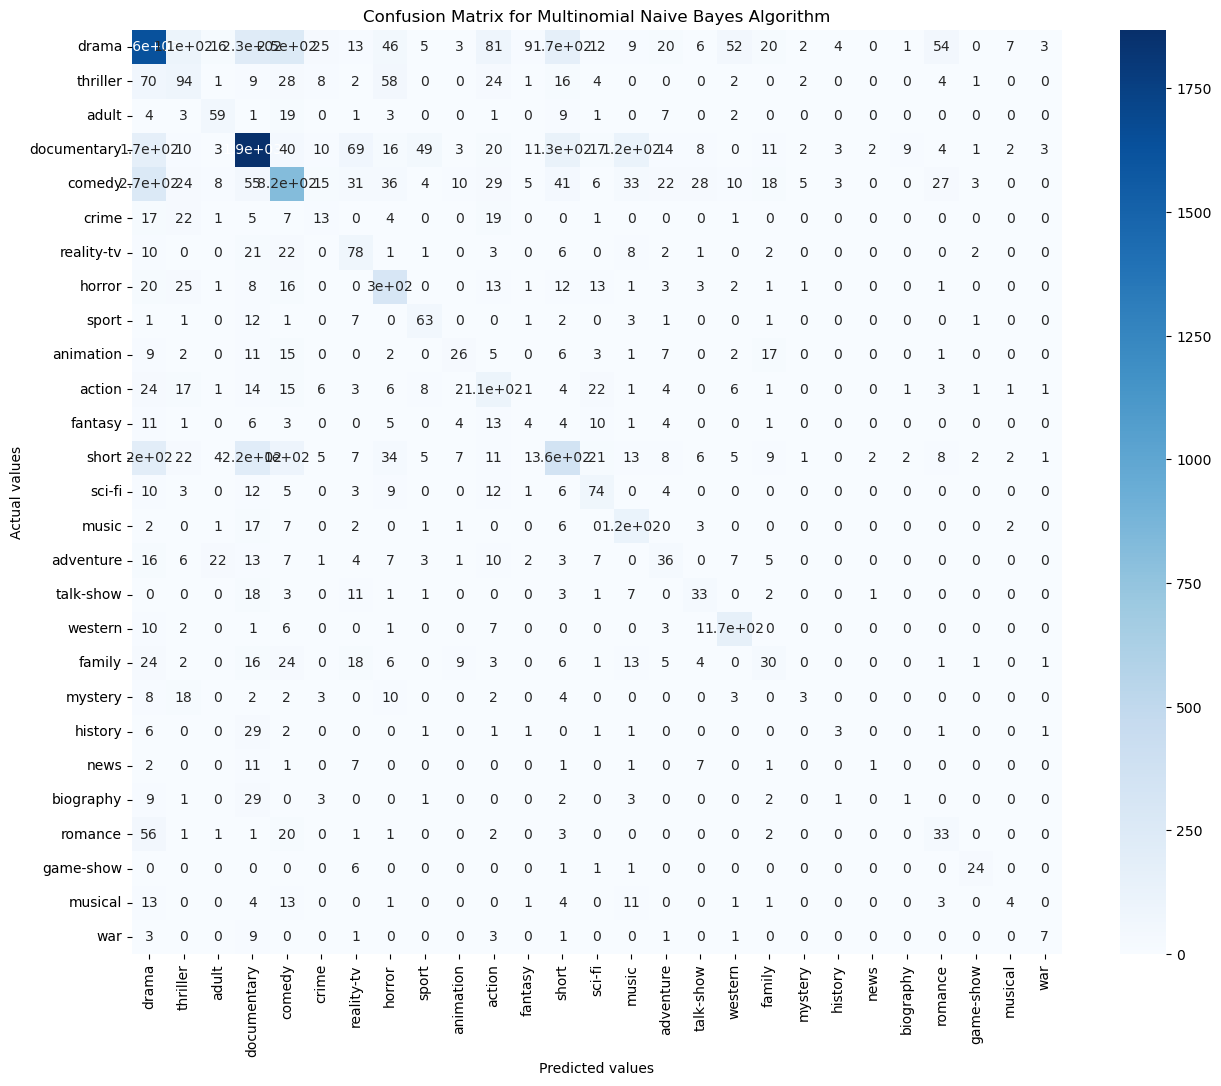

In [101]:
plt.figure(figsize=(15,12))
axis_labels = ['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime','reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy','short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western', 'family', 'mystery', 'history', 'news', 'biography', 'romance', 'game-show', 'musical', 'war']
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [102]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_mnb = MultinomialNB(alpha=i)
  temp_mnb.fit(training_x, training_y)
  temp_y_pred = temp_mnb.predict(test_x)
  score = accuracy_score(test_y, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
     

Accuracy score for alpha=0.1 is: 54.98%
Accuracy score for alpha=0.2 is: 54.39%
Accuracy score for alpha=0.3 is: 54.07%
Accuracy score for alpha=0.4 is: 54.01%
Accuracy score for alpha=0.5 is: 54.13%
Accuracy score for alpha=0.6 is: 54.24%
Accuracy score for alpha=0.7 is: 54.31%
Accuracy score for alpha=0.8 is: 54.51%
Accuracy score for alpha=0.9 is: 54.75%
Accuracy score for alpha=1.0 is: 54.92%
--------------------------------------------
The best accuracy is 54.98% with alpha value as 0.1
